In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


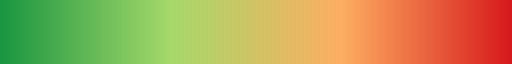

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd_050 = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4'
cwd_500 = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4'
subfolder_PL050 = glob.glob(cwd_050 + '/quinine**PL**')
subfolder_PL050.sort()
subfolder_PL500 = glob.glob(cwd_500 + '/quinine**PL**')
subfolder_PL500.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder_PL050, sep = '\n')  ## Print one element per line
print(*subfolder_PL500, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_1E-4M_300ms_PL_20230802-164522_8893342e.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_1E-4M_400ms_PL_20230802-172345_50db5e60.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_1E-4M_500ms_PL_20230802-173408_09b42f42.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_2E-4M_300ms_PL_20230802-165108_211148e0.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/quinine_2E-4M_400ms_PL_20230802-172631_06f28914.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [6]:
id0 = 8
id1 = 22
skiprows = 7 ## skip 23 rows if data processed by dioptas or ## 8

df_050 = pd.DataFrame()
for i in range(len(subfolder_PL050)):
    data_files = subfolder_PL050
    suffix = os.path.basename(subfolder_PL050[i])
    df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df_050[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df_050[f'{suffix[id0:id1]}'] = df_temp['Fluorescence']
    

df_500 = pd.DataFrame()
for i in range(len(subfolder_PL500)):
    data_files = subfolder_PL500
    suffix = os.path.basename(subfolder_PL500[i])
    df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df_500[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df_500[f'{suffix[id0:id1]}'] = df_temp['Fluorescence']
    

In [7]:
df_050

,x_1E-4M_300ms_PL,1E-4M_300ms_PL,x_1E-4M_400ms_PL,1E-4M_400ms_PL,x_1E-4M_500ms_PL,1E-4M_500ms_PL,x_2E-4M_300ms_PL,2E-4M_300ms_PL,x_2E-4M_400ms_PL,2E-4M_400ms_PL,x_2E-4M_500ms_PL,2E-4M_500ms_PL,x_5E-4M_300ms_PL,5E-4M_300ms_PL,x_5E-4M_400ms_PL,5E-4M_400ms_PL,x_5E-4M_500ms_PL,5E-4M_500ms_PL
0,197.742294,1.416667,197.742294,1.875000,197.742294,3.444444,197.742294,1.125000,197.742294,2.902778,197.742294,3.152778,197.742294,3.763889,197.742294,1.986111,197.742294,3.527778
1,198.544478,1.638889,198.544478,0.569444,198.544478,0.555556,198.544478,1.791667,198.544478,0.763889,198.544478,0.958333,198.544478,0.986111,198.544478,0.319444,198.544478,0.805556
2,199.346597,1.083333,199.346597,0.791667,199.346597,2.000000,199.346597,0.208333,199.346597,2.652778,199.346597,2.263889,199.346597,0.013889,199.346597,0.902778,199.346597,1.305556
3,200.148650,0.694444,200.148650,1.125000,200.148650,3.000000,200.148650,1.541667,200.148650,1.097222,200.148650,2.375000,200.148650,2.013889,200.148650,0.902778,200.148650,2.416667
4,200.950637,0.583333,200.950637,0.347222,200.950637,6.222222,200.950637,1.986111,200.950637,0.791667,200.950637,3.958333,200.950637,3.680556,200.950637,3.097222,200.950637,9.805556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.769837,0.861111,990.769837,0.097222,990.769837,0.000000,990.769837,0.236111,990.769837,0.902778,990.769837,2.708333,990.769837,0.319444,990.769837,2.763889,990.769837,1.416667
1040,991.489165,2.805556,991.489165,1.208333,991.489165,4.555556,991.489165,1.097222,991.489165,1.013889,991.489165,2.625000,991.489165,2.902778,991.489165,0.541667,991.489165,2.694444
1041,992.208398,1.916667,992.208398,2.791667,992.208398,1.444444,992.208398,2.430556,992.208398,1.652778,992.208398,1.180556,992.208398,0.902778,992.208398,2.458333,992.208398,0.472222
1042,992.927537,3.416667,992.927537,2.319444,992.927537,1.777778,992.927537,3.013889,992.927537,3.569444,992.927537,0.375000,992.927537,2.319444,992.927537,1.875000,992.927537,1.416667


## Check data in pd dataframe

In [8]:
df_050.shape

(1044, 18)

In [9]:
df_500.shape

(1044, 18)

## Prepare keys for average scans in pd dataframe

In [10]:
keys_050 = list(df_050.keys())
keys_500 = list(df_500.keys())

# k1 = [k for k in keys_list if 'mean' in k]
keys_500

['x_1E-4M_300ms_PL',
 '1E-4M_300ms_PL',
 'x_1E-4M_400ms_PL',
 '1E-4M_400ms_PL',
 'x_1E-4M_500ms_PL',
 '1E-4M_500ms_PL',
 'x_2E-4M_300ms_PL',
 '2E-4M_300ms_PL',
 'x_2E-4M_400ms_PL',
 '2E-4M_400ms_PL',
 'x_2E-4M_500ms_PL',
 '2E-4M_500ms_PL',
 'x_5E-4M_300ms_PL',
 '5E-4M_300ms_PL',
 'x_5E-4M_400ms_PL',
 '5E-4M_400ms_PL',
 'x_5E-4M_500ms_PL',
 '5E-4M_500ms_PL']

In [11]:
title_050 = [os.path.basename(subfolder_PL050[i]) for i in range(len(subfolder_PL050))]
print(*title_050, sep='\n')

quinine_1E-4M_300ms_PL_20230802-164522_8893342e.csv
quinine_1E-4M_400ms_PL_20230802-172345_50db5e60.csv
quinine_1E-4M_500ms_PL_20230802-173408_09b42f42.csv
quinine_2E-4M_300ms_PL_20230802-165108_211148e0.csv
quinine_2E-4M_400ms_PL_20230802-172631_06f28914.csv
quinine_2E-4M_500ms_PL_20230802-173643_a63544b0.csv
quinine_5E-4M_300ms_PL_20230802-165414_06a0fa5e.csv
quinine_5E-4M_400ms_PL_20230802-172843_fb6c7b8b.csv
quinine_5E-4M_500ms_PL_20230802-173834_58463f82.csv


In [12]:
title_500 = [os.path.basename(subfolder_PL500[i]) for i in range(len(subfolder_PL500))]
print(*title_500, sep='\n')

quinine_1E-4M_300ms_PL_20230802-180155_bc013bd4.csv
quinine_1E-4M_400ms_PL_20230802-175539_9a514f11.csv
quinine_1E-4M_500ms_PL_20230802-174630_eebe331f.csv
quinine_2E-4M_300ms_PL_20230802-180319_48fd1664.csv
quinine_2E-4M_400ms_PL_20230802-175726_e3124f23.csv
quinine_2E-4M_500ms_PL_20230802-174909_a15e5192.csv
quinine_5E-4M_300ms_PL_20230802-180457_13f94732.csv
quinine_5E-4M_400ms_PL_20230802-175847_b62eaffd.csv
quinine_5E-4M_500ms_PL_20230802-175143_1bdeebdd.csv


## Plot PL scans together

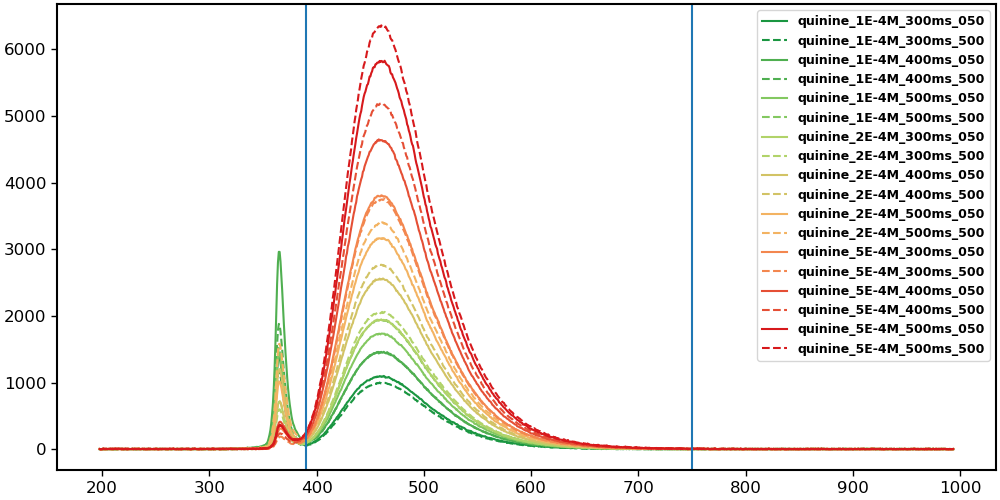

In [13]:
f1, ax1 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label_050 = title_050
label_500 = title_500
color_idx = np.linspace(0, 1, len(title_050))
id0 = 8
id1 = 20

for i in range(len(title_050)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax1.plot(df_050[keys_050[i*2]], df_050[keys_050[i*2+1]], color=cmap(color_idx[i]), label=label_050[i][:id1]+'050')
    ax1.plot(df_500[keys_500[i*2]], df_500[keys_500[i*2+1]],'--' , color=cmap(color_idx[i]), label=label_500[i][:id1]+'500')

legend_properties = {'weight':'bold', 'size': 9}    
ax1.legend(prop=legend_properties)

# ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df_050[keys_050[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df_050[keys_050[0]], wavelength_range[1])

ax1.axvline(w0)
ax1.axvline(w1)

# Absorbance

### Read Abs data into pandas dataframe

In [14]:
cwd_050 = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4'
cwd_500 = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_500mM_H2SO4'
subfolder_Ab050 = glob.glob(cwd_050 + '/plqy/quinine**Ab**')
subfolder_Ab050.sort()
subfolder_Ab500 = glob.glob(cwd_500 + '/plqy/quinine**Ab**')
subfolder_Ab500.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder_Ab050, sep = '\n')  ## Print one element per line
print(*subfolder_Ab500, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/plqy/quinine_1E-4M_300ms_Ab_offset.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/plqy/quinine_1E-4M_400ms_Ab_offset.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/plqy/quinine_1E-4M_500ms_Ab_offset.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/plqy/quinine_2E-4M_300ms_Ab_offset.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/plqy/quinine_2E-4M_400ms_Ab_offset.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230802_quinine_050mM_H2SO4/plqy/quinine_2E-4M_500ms_Ab_offset.csv
/Users/chenghunglin/Li

In [15]:
id0 = 8
id1 = 22
skiprows = 0 ## skip 23 rows if data processed by dioptas or ## 8

df_050 = pd.DataFrame()
for i in range(len(subfolder_Ab050)):
    data_files = subfolder_Ab050
    suffix = os.path.basename(subfolder_Ab050[i])
    df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df_050[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df_050[f'{suffix[id0:id1]}'] = df_temp['Absorbance']
    

df_500 = pd.DataFrame()
for i in range(len(subfolder_Ab500)):
    data_files = subfolder_Ab500
    suffix = os.path.basename(subfolder_Ab500[i])
    df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df_500[f'x_{suffix[id0:id1]}'] = df_temp['Wavelength']
    df_500[f'{suffix[id0:id1]}'] = df_temp['Absorbance']
    

In [16]:
df_500

,x_1E-4M_300ms_Ab,1E-4M_300ms_Ab,x_1E-4M_400ms_Ab,1E-4M_400ms_Ab,x_1E-4M_500ms_Ab,1E-4M_500ms_Ab,x_2E-4M_300ms_Ab,2E-4M_300ms_Ab,x_2E-4M_400ms_Ab,2E-4M_400ms_Ab,x_2E-4M_500ms_Ab,2E-4M_500ms_Ab,x_5E-4M_300ms_Ab,5E-4M_300ms_Ab,x_5E-4M_400ms_Ab,5E-4M_400ms_Ab,x_5E-4M_500ms_Ab,5E-4M_500ms_Ab
0,197.742294,0.059648,197.742294,-0.185726,197.742294,-0.713774,197.742294,0.084303,197.742294,-0.212712,197.742294,-0.815022,197.742294,0.011431,197.742294,-0.268175,197.742294,-0.785861
1,198.544478,-0.049875,198.544478,-0.111649,198.544478,-0.778903,198.544478,-0.068468,198.544478,-0.124834,198.544478,-0.877058,198.544478,-0.053099,198.544478,-0.093056,198.544478,-0.849307
2,199.346597,-0.004457,199.346597,-0.080793,199.346597,-0.662563,199.346597,-0.032580,199.346597,-0.071549,199.346597,-0.763882,199.346597,-0.033069,199.346597,0.011775,199.346597,-0.736960
3,200.148650,0.077768,200.148650,0.255287,200.148650,-0.656067,200.148650,0.092178,200.148650,0.256854,200.148650,-0.762812,200.148650,0.037673,200.148650,0.277371,200.148650,-0.730291
4,200.950637,0.179754,200.950637,0.227202,200.950637,0.180066,200.950637,0.300073,200.950637,0.308731,200.950637,0.325180,200.950637,0.429670,200.950637,0.458329,200.950637,0.514000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.769837,0.003260,990.769837,0.006177,990.769837,-0.000199,990.769837,0.003650,990.769837,0.001598,990.769837,0.056337,990.769837,-0.004374,990.769837,-0.003025,990.769837,0.011421
1040,991.489165,0.022174,991.489165,-0.012443,991.489165,-0.786526,991.489165,0.025372,991.489165,-0.011461,991.489165,-0.969706,991.489165,0.005335,991.489165,-0.011148,991.489165,-0.930073
1041,992.208398,-0.171030,992.208398,0.000000,992.208398,0.000000,992.208398,-0.250367,992.208398,0.000000,992.208398,0.000000,992.208398,-0.194359,992.208398,0.000000,992.208398,0.000000
1042,992.927537,0.324316,992.927537,0.000000,992.927537,-1.103918,992.927537,0.208023,992.927537,0.000000,992.927537,-1.300426,992.927537,0.264041,992.927537,0.000000,992.927537,-1.257185


## Prepare keys for average scans in pd dataframe

In [17]:
keys_050 = list(df_050.keys())
keys_500 = list(df_500.keys())

# k1 = [k for k in keys_list if 'mean' in k]
keys_500

['x_1E-4M_300ms_Ab',
 '1E-4M_300ms_Ab',
 'x_1E-4M_400ms_Ab',
 '1E-4M_400ms_Ab',
 'x_1E-4M_500ms_Ab',
 '1E-4M_500ms_Ab',
 'x_2E-4M_300ms_Ab',
 '2E-4M_300ms_Ab',
 'x_2E-4M_400ms_Ab',
 '2E-4M_400ms_Ab',
 'x_2E-4M_500ms_Ab',
 '2E-4M_500ms_Ab',
 'x_5E-4M_300ms_Ab',
 '5E-4M_300ms_Ab',
 'x_5E-4M_400ms_Ab',
 '5E-4M_400ms_Ab',
 'x_5E-4M_500ms_Ab',
 '5E-4M_500ms_Ab']

In [18]:
title_050 = [os.path.basename(subfolder_Ab050[i]) for i in range(len(subfolder_PL050))]
print(*title_050, sep='\n')

quinine_1E-4M_300ms_Ab_offset.csv
quinine_1E-4M_400ms_Ab_offset.csv
quinine_1E-4M_500ms_Ab_offset.csv
quinine_2E-4M_300ms_Ab_offset.csv
quinine_2E-4M_400ms_Ab_offset.csv
quinine_2E-4M_500ms_Ab_offset.csv
quinine_5E-4M_300ms_Ab_offset.csv
quinine_5E-4M_400ms_Ab_offset.csv
quinine_5E-4M_500ms_Ab_offset.csv


In [19]:
title_500 = [os.path.basename(subfolder_Ab500[i]) for i in range(len(subfolder_PL500))]
print(*title_500, sep='\n')

quinine_1E-4M_300ms_Ab_offset.csv
quinine_1E-4M_400ms_Ab_offset.csv
quinine_1E-4M_500ms_Ab_offset.csv
quinine_2E-4M_300ms_Ab_offset.csv
quinine_2E-4M_400ms_Ab_offset.csv
quinine_2E-4M_500ms_Ab_offset.csv
quinine_5E-4M_300ms_Ab_offset.csv
quinine_5E-4M_400ms_Ab_offset.csv
quinine_5E-4M_500ms_Ab_offset.csv


## Plot Absorption scans together

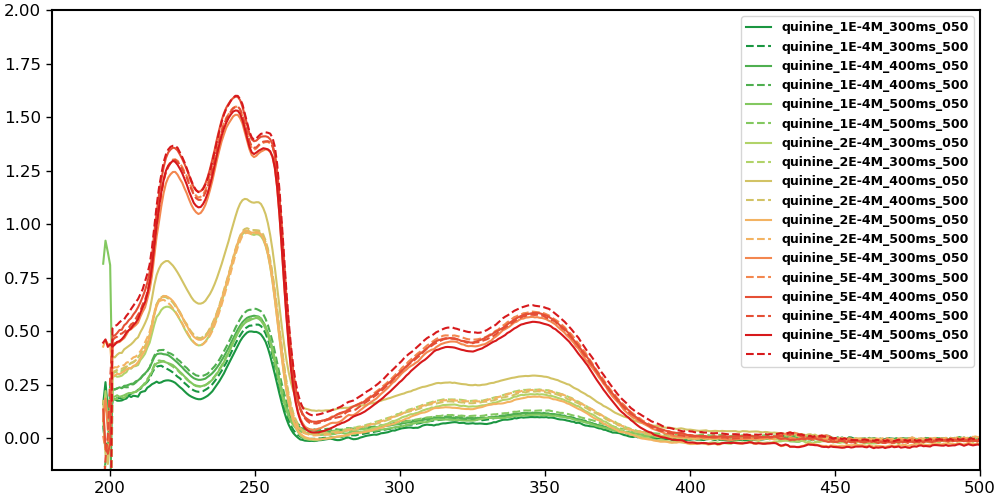

In [20]:
f2, ax2 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label_050 = title_050
label_500 = title_500
color_idx = np.linspace(0, 1, len(title_050))
id0 = 8
id1 = 20

for i in range(len(title_050)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df_050[keys_050[i*2]], df_050[keys_050[i*2+1]], color=cmap(color_idx[i]), label=label_050[i][:id1]+'050')
    ax2.plot(df_500[keys_500[i*2]], df_500[keys_500[i*2+1]],'--' , color=cmap(color_idx[i]), label=label_500[i][:id1]+'500')

legend_properties = {'weight':'bold', 'size': 9}    
ax2.legend(prop=legend_properties)

ax2.set_xlim(180, 500)
ax2.set_ylim(-0.15, 2)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


## Compare simpson integrate

In [21]:
fn_050 = '050mM_simpson_integrate.txt'
fn_500 = '500mM_simpson_integrate.txt'
df_050 = pd.read_csv(fn_050, sep=' ')
df_500 = pd.read_csv(fn_500, sep=' ')

df = pd.DataFrame()
sample = [df_050['Data_source'].to_list()[i][:19] for i in range(df_050.shape[0])]
df['Sample'] = sample
df['050mM_SO4_integrate'] = df_050['Simpson_integrate']
df['500mM_SO4_integrate'] = df_500['Simpson_integrate']

fn_050 = '050mM_abs_365.txt'
fn_500 = '500mM_abs_365.txt'
df_050 = pd.read_csv(fn_050, sep=' ')
df_500 = pd.read_csv(fn_500, sep=' ')

df['050mM_SO4_Abs365'] = df_050['Abs_offset_365']
df['500mM_SO4_Abs365'] = df_500['Abs_offset_365']

df

,Sample,050mM_SO4_integrate,500mM_SO4_integrate,050mM_SO4_Abs365,500mM_SO4_Abs365
0,quinine_1E-4M_300ms,110214.0,100228.0,0.058852,0.075017
1,quinine_1E-4M_400ms,147919.0,146868.0,0.075119,0.074205
2,quinine_1E-4M_500ms,175235.0,196055.0,0.072198,0.089914
3,quinine_2E-4M_300ms,196360.0,207045.0,0.122467,0.146470
4,quinine_2E-4M_400ms,258291.0,279153.0,0.199569,0.138089
5,quinine_2E-4M_500ms,319874.0,343488.0,0.115021,0.146218
6,quinine_5E-4M_300ms,384497.0,378046.0,0.357053,0.382666
7,quinine_5E-4M_400ms,468573.0,523208.0,0.376390,0.370195
8,quinine_5E-4M_500ms,588011.0,640529.0,0.340616,0.405307
